In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [24]:
df = pd.read_csv('data/yolo_models_comparison.csv')
df['model_id'] = df['size'] + '_layers' + df['yolo_layers_freezed'].astype(str)

# 1.Сравнение метрик моделей при обучении

## 1.1 Основные метрики качества

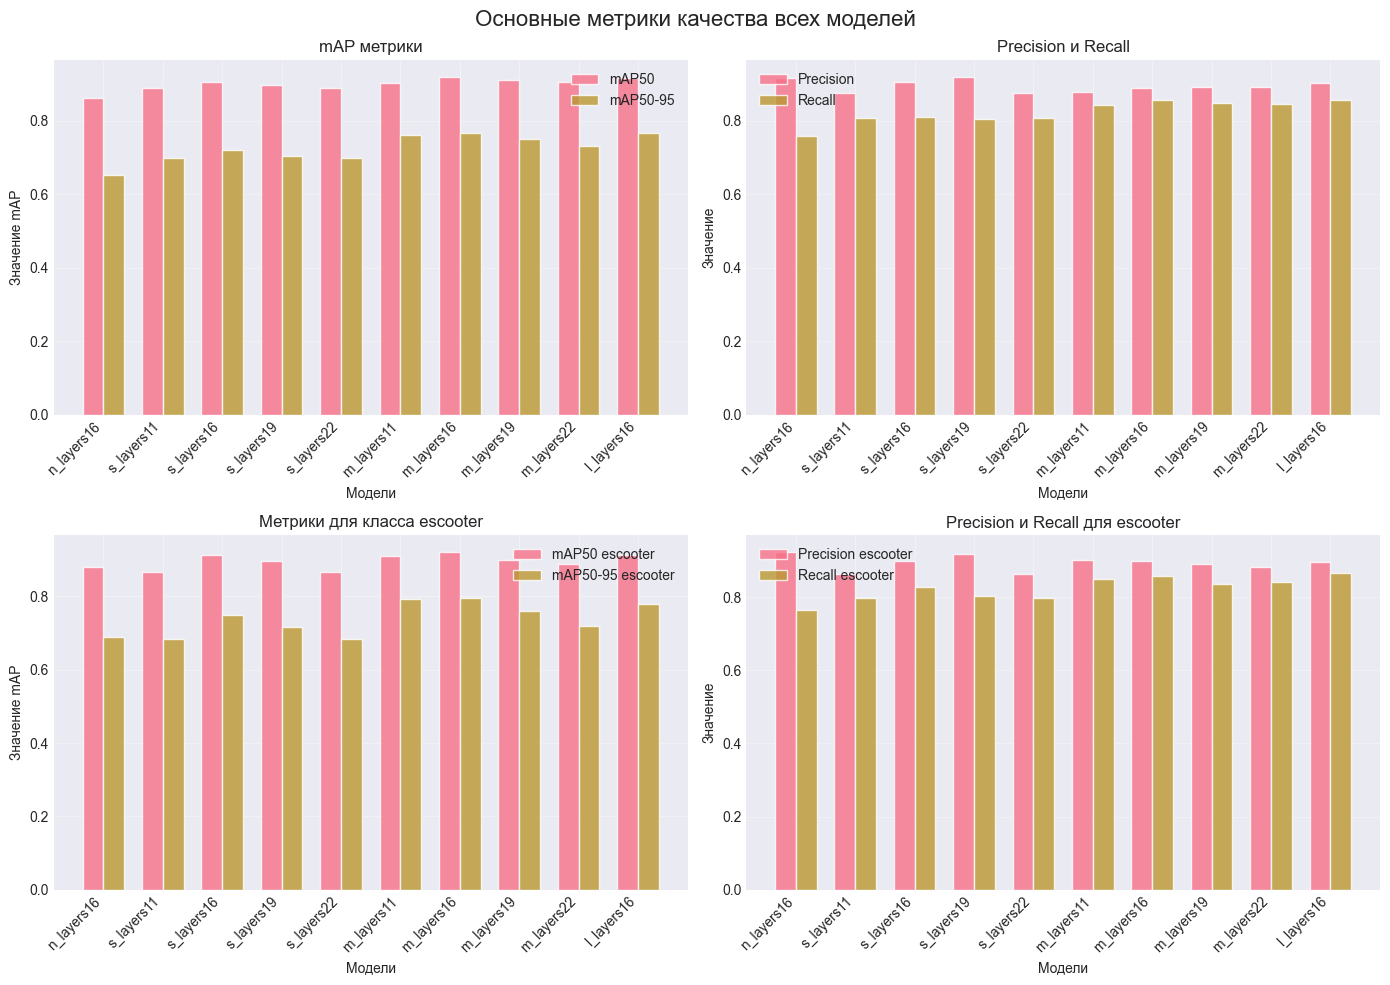

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Основные метрики качества всех моделей', fontsize=16)

# 1.1 mAP метрики
ax = axes[0, 0]
x = np.arange(len(df))
width = 0.35
ax.bar(x - width/2, df['map50'], width, label='mAP50', alpha=0.8)
ax.bar(x + width/2, df['map50-95'], width, label='mAP50-95', alpha=0.8)
ax.set_xlabel('Модели')
ax.set_ylabel('Значение mAP')
ax.set_title('mAP метрики')
ax.set_xticks(x)
ax.set_xticklabels(df['model_id'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# 1.2 Precision и Recall
ax = axes[0, 1]
ax.bar(x - width/2, df['P'], width, label='Precision', alpha=0.8)
ax.bar(x + width/2, df['R'], width, label='Recall', alpha=0.8)
ax.set_xlabel('Модели')
ax.set_ylabel('Значение')
ax.set_title('Precision и Recall')
ax.set_xticks(x)
ax.set_xticklabels(df['model_id'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# 1.3 Метрики для escooter
ax = axes[1, 0]
ax.bar(x - width/2, df['map50-escooter'], width, label='mAP50 escooter', alpha=0.8)
ax.bar(x + width/2, df['map50-95-escooter'], width, label='mAP50-95 escooter', alpha=0.8)
ax.set_xlabel('Модели')
ax.set_ylabel('Значение mAP')
ax.set_title('Метрики для класса escooter')
ax.set_xticks(x)
ax.set_xticklabels(df['model_id'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# 1.4 Precision и Recall для escooter
ax = axes[1, 1]
ax.bar(x - width/2, df['P-escooter'], width, label='Precision escooter', alpha=0.8)
ax.bar(x + width/2, df['R-escooter'], width, label='Recall escooter', alpha=0.8)
ax.set_xlabel('Модели')
ax.set_ylabel('Значение')
ax.set_title('Precision и Recall для escooter')
ax.set_xticks(x)
ax.set_xticklabels(df['model_id'], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В целом для моделей характерно увеличение качества и с ростом количества параметров (от меньшего к большему, n-s-m-l)

Также заморозка 16 слоев дает лучшие значения для моделей s и m по качеству.

(16\23 слоев для YOLO11, где слой - специальный параметр, отображающий один из 23 этапов обработки изображения, в не слой нейросети в классическом понимании)

## 1.2 Сравнение производительности моделей

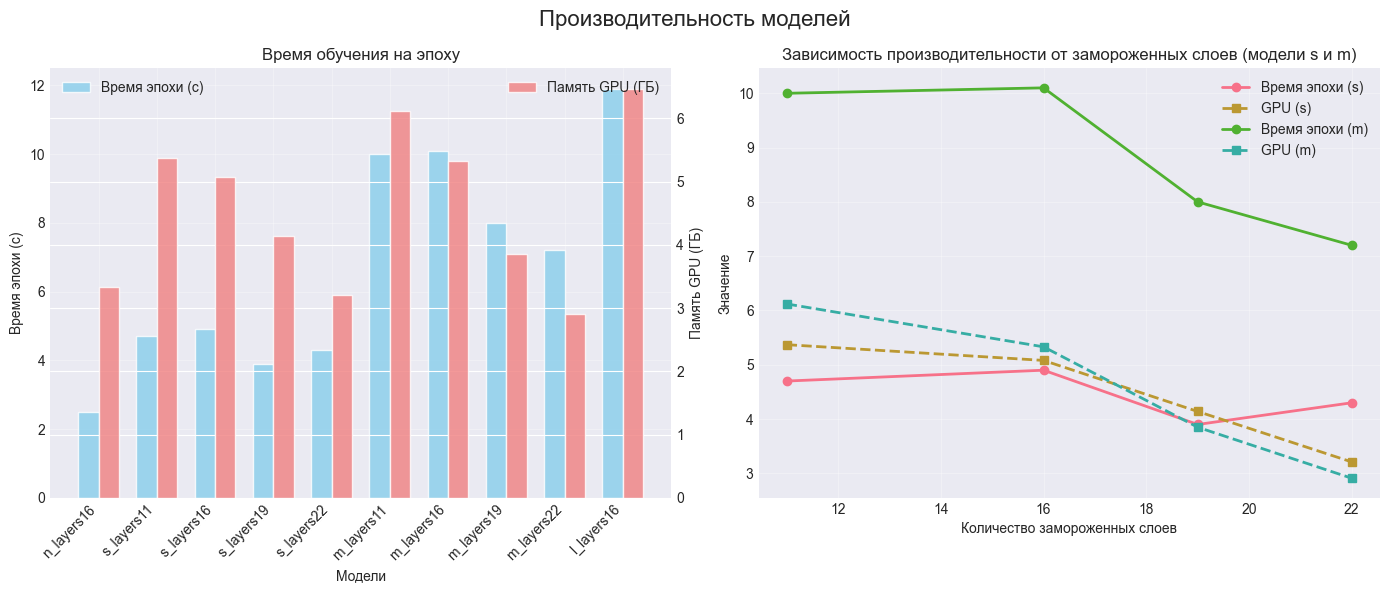

In [26]:
# 2. Производительность моделей
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Производительность моделей', fontsize=16)

# 2.1 Время эпохи и потребление GPU
ax = axes[0]
x = np.arange(len(df))
ax.bar(x - width/2, df['epoch_time'], width, label='Время эпохи (с)', color='skyblue', alpha=0.8)
ax.set_xlabel('Модели')
ax.set_ylabel('Время эпохи (с)')
ax.set_title('Время обучения на эпоху')
ax.set_xticks(x)
ax.set_xticklabels(df['model_id'], rotation=45, ha='right')
ax.grid(True, alpha=0.3)

ax2 = ax.twinx()
ax2.bar(x + width/2, df['GPU'], width, label='Память GPU (ГБ)', color='lightcoral', alpha=0.8)
ax2.set_ylabel('Память GPU (ГБ)')
ax2.legend(loc='upper right')
ax.legend(loc='upper left')

# 2.2 Зависимость производительности от количества замороженных слоев (только для s и m)
ax = axes[1]
for size in ['s', 'm']:
    size_df = df[df['size'] == size].sort_values('yolo_layers_freezed')
    ax.plot(size_df['yolo_layers_freezed'], size_df['epoch_time'],
            marker='o', label=f'Время эпохи ({size})', linewidth=2)
    ax.plot(size_df['yolo_layers_freezed'], size_df['GPU'],
            marker='s', label=f'GPU ({size})', linestyle='--', linewidth=2)

ax.set_xlabel('Количество замороженных слоев')
ax.set_ylabel('Значение')
ax.set_title('Зависимость производительности от замороженных слоев (модели s и m)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

В целом для моделей характерно уменьшение производительности пропорционально росту количества параметров (от меньшего к большему, n-s-m-l) и обратно пропорционально количеству замороженных слоев.

## 1.2 Сравнение моделей при одинаковом параметре freeze = 16

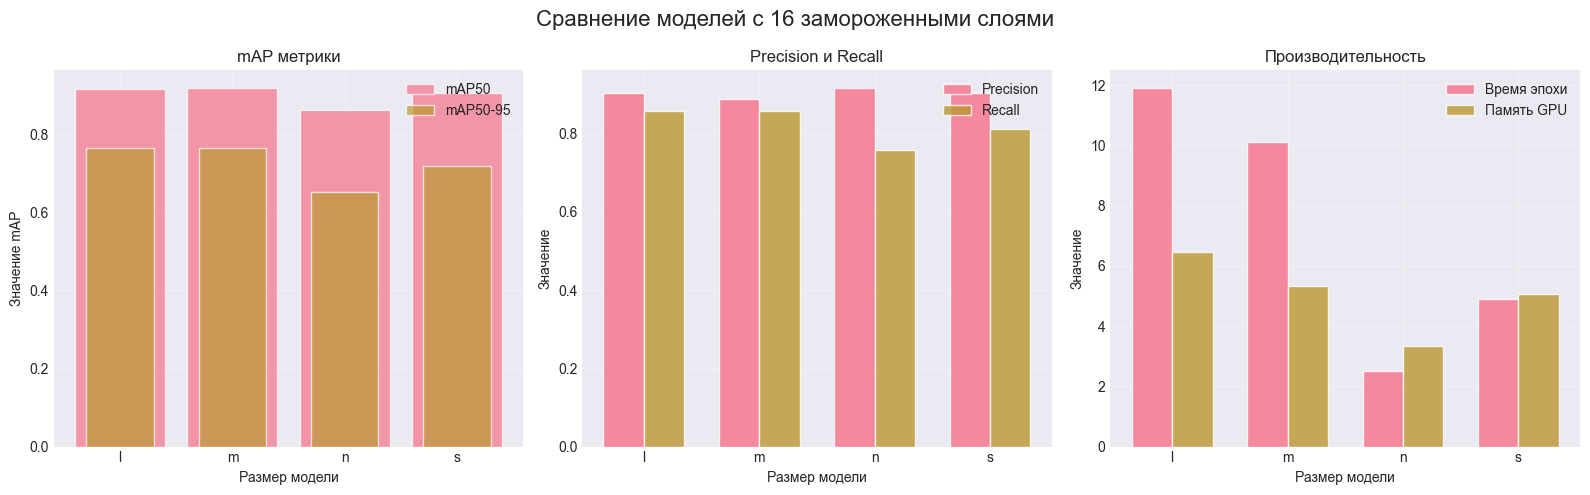

In [27]:
# 3. Сравнение моделей с yolo_layers_freezed = 16
fig, axes = plt.subplots(1, 3, figsize=(16, 5))
fig.suptitle('Сравнение моделей с 16 замороженными слоями', fontsize=16)

layers_16_df = df[df['yolo_layers_freezed'] == 16].sort_values('size')

# 3.1 mAP сравнение
ax = axes[0]
sizes = layers_16_df['size']
x = np.arange(len(sizes))
ax.bar(x, layers_16_df['map50'], width=0.8, label='mAP50', alpha=0.7)
ax.bar(x, layers_16_df['map50-95'], width=0.6, label='mAP50-95', alpha=0.7)
ax.set_xlabel('Размер модели')
ax.set_ylabel('Значение mAP')
ax.set_title('mAP метрики')
ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.legend()
ax.grid(True, alpha=0.3)

# 3.2 Precision и Recall
ax = axes[1]
ax.bar(x - width/2, layers_16_df['P'], width, label='Precision', alpha=0.8)
ax.bar(x + width/2, layers_16_df['R'], width, label='Recall', alpha=0.8)
ax.set_xlabel('Размер модели')
ax.set_ylabel('Значение')
ax.set_title('Precision и Recall')
ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.legend()
ax.grid(True, alpha=0.3)

# 3.3 Производительность
ax = axes[2]
ax.bar(x - width/2, layers_16_df['epoch_time'], width, label='Время эпохи', alpha=0.8)
ax.bar(x + width/2, layers_16_df['GPU'], width, label='Память GPU', alpha=0.8)
ax.set_xlabel('Размер модели')
ax.set_ylabel('Значение')
ax.set_title('Производительность')
ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Для более детального анализа выбраны модели YOLO11 s и m, так как n показывает значительно меньшие результаты качества, а модель l - не дает большого прироста качества по сравнению с достаточными параметрами m, но требует больше времени и производительности для использования. Это также причина отсутствия в анализе модели x.

# 2. Сравнение качества детекции и производительности моделей s и m

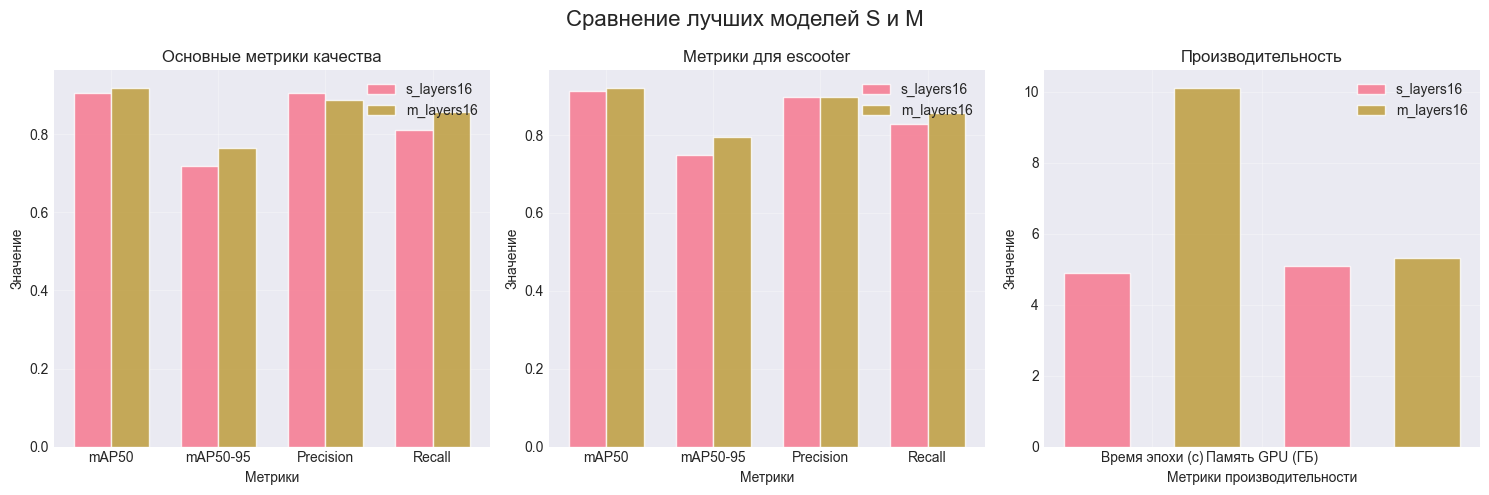

In [28]:
# 4. Сравнение лучших моделей s и m
# Найдем лучшие модели по mAP50
best_s = df[df['size'] == 's'].sort_values('map50', ascending=False).iloc[0]
best_m = df[df['size'] == 'm'].sort_values('map50', ascending=False).iloc[0]

best_models = pd.DataFrame([best_s, best_m])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Сравнение лучших моделей S и M', fontsize=16)

# 4.1 Основные метрики
ax = axes[0]
metrics = ['map50', 'map50-95', 'P', 'R']
x = np.arange(len(metrics))
width = 0.35

for i, (idx, row) in enumerate(best_models.iterrows()):
    values = [row[metric] for metric in metrics]
    ax.bar(x + i*width - width/2, values, width,
           label=f"{row['size']}_layers{int(row['yolo_layers_freezed'])}", alpha=0.8)

ax.set_xlabel('Метрики')
ax.set_ylabel('Значение')
ax.set_title('Основные метрики качества')
ax.set_xticks(x)
ax.set_xticklabels(['mAP50', 'mAP50-95', 'Precision', 'Recall'])
ax.legend()
ax.grid(True, alpha=0.3)

# 4.2 Метрики для escooter
ax = axes[1]
metrics_escooter = ['map50-escooter', 'map50-95-escooter', 'P-escooter', 'R-escooter']

for i, (idx, row) in enumerate(best_models.iterrows()):
    values = [row[metric] for metric in metrics_escooter]
    ax.bar(x + i*width - width/2, values, width,
           label=f"{row['size']}_layers{int(row['yolo_layers_freezed'])}", alpha=0.8)

ax.set_xlabel('Метрики')
ax.set_ylabel('Значение')
ax.set_title('Метрики для escooter')
ax.set_xticks(x)
ax.set_xticklabels(['mAP50', 'mAP50-95', 'Precision', 'Recall'])
ax.legend()
ax.grid(True, alpha=0.3)

# 4.3 Производительность
ax = axes[2]
perf_metrics = ['epoch_time', 'GPU']

for i, (idx, row) in enumerate(best_models.iterrows()):
    values = [row['epoch_time'], row['GPU']]
    ax.bar([i, i + len(best_models)], values, width=0.6,
           label=f"{row['size']}_layers{int(row['yolo_layers_freezed'])}", alpha=0.8)

ax.set_xlabel('Метрики производительности')
ax.set_ylabel('Значение')
ax.set_title('Производительность')
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['Время эпохи (с)', 'Память GPU (ГБ)'])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Метрики map логично выше для m модели, а Precision и Recall более сбалансированы без изменения других параметров обучения. Время обучения для m выше почти в два раза.

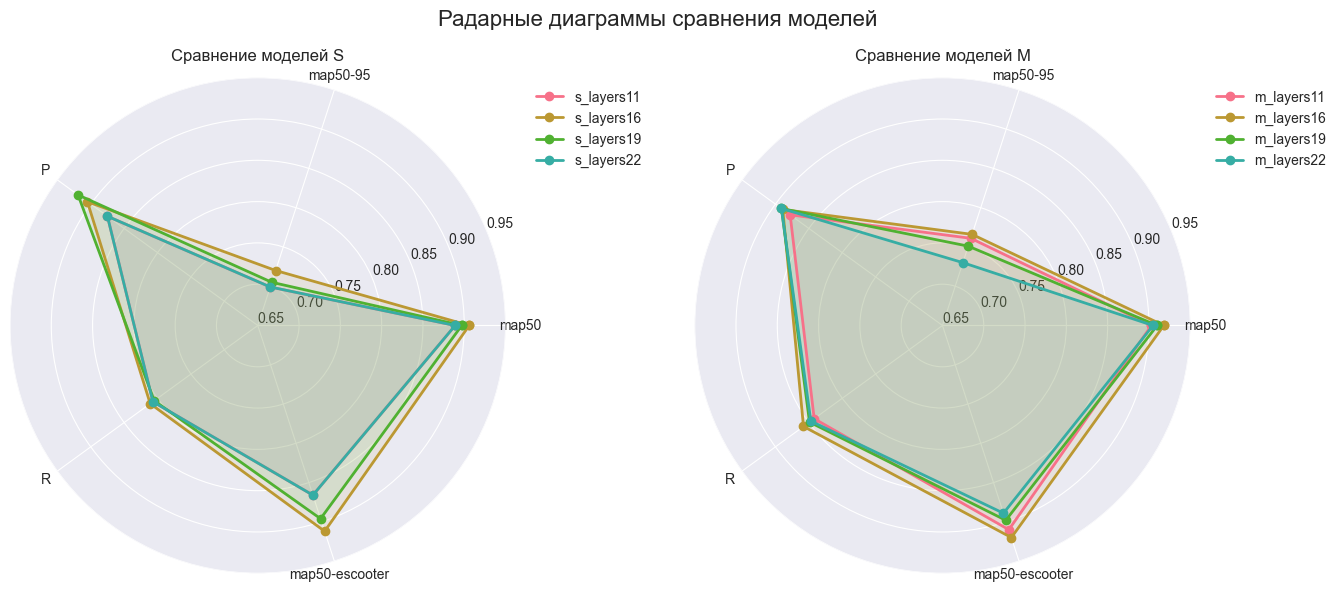

In [32]:
# 5. Радарные диаграммы для сравнения моделей
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw=dict(projection='polar'))
fig.suptitle('Радарные диаграммы сравнения моделей', fontsize=16)

# Подготовка данных для радарных диаграмм
categories = ['map50', 'map50-95', 'P', 'R', 'map50-escooter']
N = len(categories)

# Углы для каждой категории
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Замыкаем круг

# 5.1 Сравнение всех моделей s
ax = axes[0]
s_models = df[df['size'] == 's']

for idx, row in s_models.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]  # Замыкаем круг

    ax.plot(angles, values, linewidth=2,
            label=f"s_layers{int(row['yolo_layers_freezed'])}", marker='o')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0.65, 0.95)
ax.set_title('Сравнение моделей S')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

# 5.2 Сравнение всех моделей m
ax = axes[1]
m_models = df[df['size'] == 'm']

for idx, row in m_models.iterrows():
    values = [row[cat] for cat in categories]
    values += values[:1]

    ax.plot(angles, values, linewidth=2,
            label=f"m_layers{int(row['yolo_layers_freezed'])}", marker='o')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_ylim(0.65, 0.95)
ax.set_title('Сравнение моделей M')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

Здесь также виден лучший баланс Precision и Recall у модели m.

Также ключевой разницей можно считать изменение map50-95. При близких значениях map50, map50-95 для s модели ниже и на его изменение мало влияет количество обучаемых слоев, из чего можно сделать вывод, что на данном датасете эта модель не может достигнуть существенно больших результатов в этом параметре.

# 3. Оценка корреляции параметров

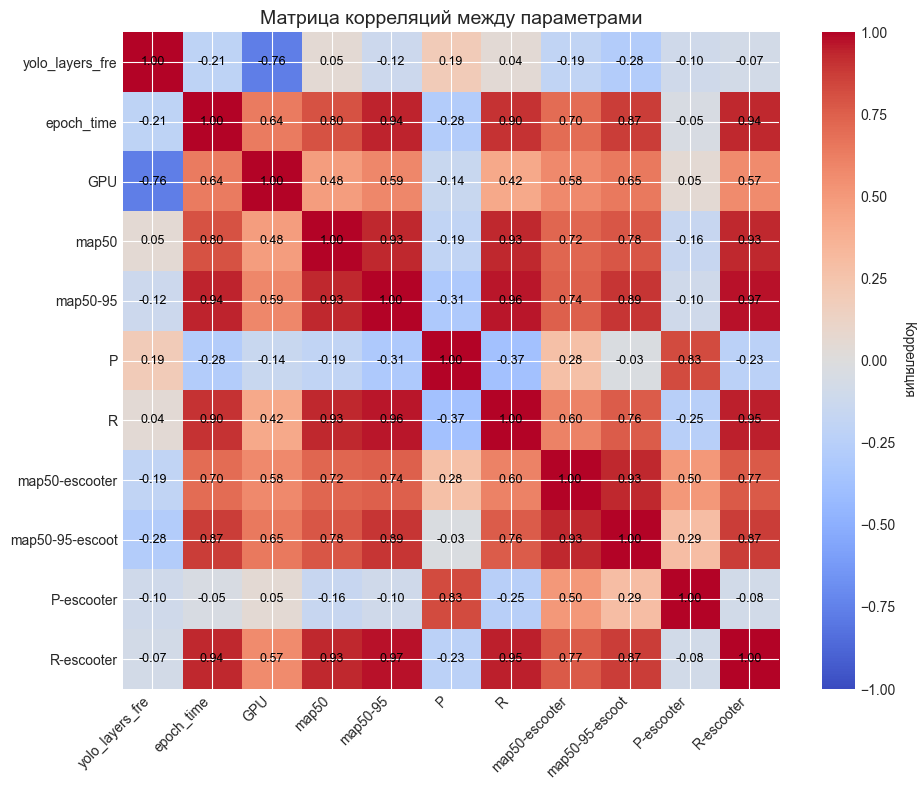

In [30]:
# 6. Тепловая карта корреляций
fig, ax = plt.subplots(figsize=(10, 8))

# Выбираем числовые столбцы для корреляции
numeric_cols = ['yolo_layers_freezed', 'epoch_time', 'GPU', 'map50', 'map50-95',
                'P', 'R', 'map50-escooter', 'map50-95-escooter', 'P-escooter', 'R-escooter']
corr_matrix = df[numeric_cols].corr()

# Создаем тепловую карту
im = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# Добавляем аннотации
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=9)

# Настройки осей
ax.set_xticks(range(len(corr_matrix)))
ax.set_yticks(range(len(corr_matrix)))
ax.set_xticklabels([col[:15] for col in numeric_cols], rotation=45, ha='right')
ax.set_yticklabels([col[:15] for col in numeric_cols])
ax.set_title('Матрица корреляций между параметрами', fontsize=14)

# Добавляем colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Корреляция', rotation=-90, va="bottom")

plt.tight_layout()
plt.show()

In [31]:
print("Лучшие модели:")

print("\n1. Лучшая модель S:")
print(f"   Модель: s_layers{int(best_s['yolo_layers_freezed'])}")
print(f"   mAP50: {best_s['map50']:.3f}")
print(f"   mAP50-95: {best_s['map50-95']:.3f}")
print(f"   Время эпохи: {best_s['epoch_time']:.1f} с")
print(f"   Память GPU: {best_s['GPU']:.2f} ГБ")

print("\n2. Лучшая модель M:")
print(f"   Модель: m_layers{int(best_m['yolo_layers_freezed'])}")
print(f"   mAP50: {best_m['map50']:.3f}")
print(f"   mAP50-95: {best_m['map50-95']:.3f}")
print(f"   Время эпохи: {best_m['epoch_time']:.1f} с")
print(f"   Память GPU: {best_m['GPU']:.2f} ГБ")

print("\n3. Все модели с 16 замороженными слоями:")
for idx, row in layers_16_df.iterrows():
    print(f"   {row['size']}_layers16: mAP50={row['map50']:.3f}, "
          f"Время={row['epoch_time']:.1f}с, GPU={row['GPU']:.2f}ГБ")

Лучшие модели:

1. Лучшая модель S:
   Модель: s_layers16
   mAP50: 0.906
   mAP50-95: 0.720
   Время эпохи: 4.9 с
   Время эпохи: 4.9 с
   Память GPU: 5.08 ГБ

2. Лучшая модель M:
   Модель: m_layers16
   mAP50: 0.918
   mAP50-95: 0.766
   Время эпохи: 10.1 с
   Память GPU: 5.33 ГБ

3. Все модели с 16 замороженными слоями:
   l_layers16: mAP50=0.916, Время=11.9с, GPU=6.47ГБ
   m_layers16: mAP50=0.918, Время=10.1с, GPU=5.33ГБ
   n_layers16: mAP50=0.862, Время=2.5с, GPU=3.34ГБ
   s_layers16: mAP50=0.906, Время=4.9с, GPU=5.08ГБ


<div align="center">
  <img src="images/BoxF1_curve_m16.png" width="40%"> <img src="images/BoxF1_curve_s16.png" width="40%">
</div>

### Анализ F1-Curve

#### YOLO11m16:
- **Пиковое значение F1**: 0.87 при пороге 0.443
- **Оптимальный рабочий диапазон**: Пороги 0.15-0.85 дают F1 > 0.8
- **Ширина кривой**: Широкая платообразная область, значит модель устойчива к выбору порога
- **Спад при низких порогах**: Незначительный, что говорит о хорошем recall
- **Спад при высоких порогах**: Быстрый спад после 0.85 - модель становится слишком консервативной

#### YOLO11s16:
- **Пиковое значение F1**: 0.86 при пороге 0.503
- **Максимальный F1 ниже**: На 0.01 меньше чем у m16
- **Чуть уже рабочий диапазон**: Пороги 0.2-0.8 дают F1 > 0.8
- **Кривая более "острая"**: Быстрее спадает по краям, значительный спад при низких порогах

<div align="center">
  <img src="images/BoxPR_curve_m16.png" width="40%"> <img src="images/BoxPR_curve_s16.png" width="40%">
</div>

### Анализ PR-Curve

#### YOLO11m16:
- **Площадь под кривой (AP)**: Высокая, 0.918 для mAP50
- **Форма кривой**: Плавная, выпуклая, близкая к идеальному правому верхнему углу
- **Балансная точка**: Precision 0.889, Recall 0.858

#### YOLO11s16:
- **Площадь под кривой (AP)**: Чуть ниже, 0.906 для mAP50
- **Более крутой спад**: Быстрее теряет Precision при увеличении Recall
- **Балансная точка**: Precision 0.905, Recall 0.811


**Для поиска нарушений, важнее найти все объекты, чем не найти лишних**:
   - YOLO11m16 сохраняет приемлемую точность при высоком recall
   - YOLO11s16 сохраняет быстрее теряет recall, поэтому чуть менее эффективен для поиска нарушений


<div align="center">
  <img src="images/confusion_matrix_m16.png" width="40%"> <img src="images/confusion_matrix_s16.png" width="40%">
</div>

### Анализ Confusion Matrix



#### YOLO11m16:
- **Высокая диагональ**: Большинство значений концентрируется на главной диагонали
- **Детекций:**: 530
- **Background ошибки (False Positives)**: 14.7% ложных срабатываний
- **Пропущенные объекты (False Negatives)**: 9.2% пропусков

#### YOLO11s16:
- **Более "размытая" диагональ**: Больше ошибок между классами
- **Детекций:**: 547
- **Background ошибки (False Positives)**: 17.4% ложных срабатываний
- **Пропущенные объекты (False Negatives)**: 10.1% пропусков

#### Анализ по классам:
- Классы хорошо различимы между собой, но путаются с фоном
- Результаты значительно улучшаются при анализе с правильным порогом уверенности (из F1)
- Самокаты могут быть спутаны с похожими объектами на фоне
- Самокаты плохо различимы в маленьком размере

### Вывод:

Для оценки производительности в работе и дальнейшей имплементации будут сравниваться модели YOLO11m и YOLO11s с freeze=16. Преимущество в качестве у YOLO11m